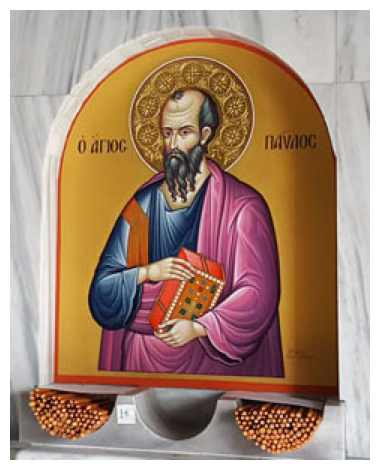

In [4]:
import numpy as np, cv2, matplotlib.pyplot as plt

def calc_histo(image, channels, hsize, ranges ):
    ch = len(channels)
    shape = hsize if ch >1 else (hsize[0], 1)
    hist = np.zeros(shape, np.float32) # 히스토그램 누적 행렬
    gap = np.divide(ranges[1::2], hsize)   # 계급 간격

    for row in image:  # 2차원 행렬 순회 방식
        for val in row:
            idx = np.divide(val[channels], gap).astype('uint')
            hist[tuple(idx)]+= 1
    return hist
pass

image = cv2.imread("img/pixel.jpg") # 영상 읽기 

ch, hsize, ranges = [0,1],  [8, 8], [0, 256, 0, 256] # 히스토그램 간격수, 값 범위
hist1 = calc_histo(image, ch ,hsize, ranges)                  # 사용자 정의 히스토그램 계산
hist2 = cv2.calcHist([image], ch, None, hsize, ranges)  # OpenCV 함수
 
# 결과 출력
plt.imshow( image[:,:,::-1] )
plt.axis( 'off' )
plt.tight_layout()
plt.show()